In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('bike_dataset.csv')
df.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          361 non-null    object 
 1   price               361 non-null    int64  
 2   CC                  304 non-null    float64
 3   mileage             361 non-null    float64
 4   type_of_bike        361 non-null    object 
 5   weight_in_kg        361 non-null    int64  
 6   links               361 non-null    object 
 7   acceleration_speed  170 non-null    float64
 8   top_speed           200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 25.5+ KB


In [4]:
df.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


In [5]:
df.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

### Imputing missing values through mean , median , mode or constant

In [6]:
df1 = df.copy()
df1.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [7]:
# can use mean , median , mode or constant value to fill-
df1.fillna(df1.median(),inplace = True)

C:\Users\deepak\AppData\Local\Temp\ipykernel_8644\4159649999.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(df1.median(),inplace = True)


In [8]:
df1.isnull().sum()

model_name            0
price                 0
CC                    0
mileage               0
type_of_bike          0
weight_in_kg          0
links                 0
acceleration_speed    0
top_speed             0
dtype: int64

### Imputation Using (Mean/Median) Values- using SimpleImpute Class

In [9]:
mean_imputed_df = df.copy()
mean_imputed_df.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [10]:
# mean/median only for numeric features,  strategy='most_frequent' or mode for categorical features
from sklearn.impute import SimpleImputer
si = SimpleImputer( strategy='median') #for median imputation replace 'mean' with 'median'
mean_imputed_df['CC'] = si.fit_transform(mean_imputed_df[['CC']]) # mean_imputed_df['CC'].values.reshape(-1,1)


In [11]:
mean_imputed_df.isnull().sum()

model_name              0
price                   0
CC                      0
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [ ]:
# importing data with some more nan values in type_of_bike col-

In [12]:
df2 = pd.read_csv('bike_dataset2.csv')
df2.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


In [13]:
df2.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike           10
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

In [14]:
# df.fillna is much easier way of imputing missing values than SimpleImputer
df2['top_speed'].fillna(df2['top_speed'].mean(),inplace = True)

In [15]:
df2.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike           10
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed               0
dtype: int64

In [16]:
# mode for categorical col , strategy = 'most_frequent'-
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')
df2['type_of_bike'] = si.fit_transform(df2[['type_of_bike']])

In [17]:
df2.isnull().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed               0
dtype: int64

In [ ]:
# MICE -

In [82]:
dx = pd.DataFrame({'A': [2, 3, np.nan, 5],
                   'B': [np.nan, 9, 16, 25]})
dx

,A,B
0,2.0,NaN
1,3.0,9.0
2,NaN,16.0
3,5.0,25.0


In [74]:
dz = pd.DataFrame({'A': [2, 3, np.nan, 5],
                   'B': [np.nan, 9, 16, 25],
                    'C': ['air','air','water',np.nan]})
dz

,A,B,C
0,2.0,NaN,air
1,3.0,9.0,air
2,NaN,16.0,water
3,5.0,25.0,NaN


In [51]:
df_mice = dx.copy()

In [43]:
df_mice.values

array([[ 2., nan],
       [ 3.,  9.],
       [nan, 16.],
       [ 5., 25.]])

In [44]:
df_mice.isnull().sum()

A    1
B    1
dtype: int64

### MICE stands for Multivariate Imputation By Chained Equations algorithm 

MICE first calculates the mean of every column where there is a missing value and uses the mean value as a placeholder.
Then it runs a series of regression models (chained equations) to impute each missing value sequentially.
Like in any regression model, MICE uses a feature matrix and target variable to train, and in this case, the target variable
is the column with missing values. MICE predicts and updates missing values on target columns.
Iteratively, MICE repeats this process several times by constantly changing the placeholder variables with the predictions
from the previous iteration. In the end, it reaches a robust estimation.

To apply MICE algorithm, we will use IterativeImputer from scikit-learn. This estimator is still under experimental so
we must import enable_iterative_imputer.


Working of MICE algorithm-
Step 1: Impute all missing values using mean imputation with the mean of their respective columns.
We will call this as our "Zeroth" dataset
Note:
We will be imputing the columns from left to right.

Step 2: Remove the "age" imputed values and keep the imputed values in other columns as shown here.

Step 3: The remaining features and rows(top 5 rows of experience and salary) become the feature matrix(purple cells), "age" becomes the target variable(yellow cells). We will run the linear regression model on the fully filled rows with X= experience and salary and Y=age. To estimate the missing age, we will use the missing value row (white cells) as the test data.
So, top 5 rows will be training data and the last row that has missing age will be test data. We will use (experience = 11 and salary = 130) to predict corresponding "age" value.
When I did this, I found that my model predicted the age as 34.99.

step 4: Update the predicted age value in the missing cell in "age" column. Now, remove "experience" imputed value. The remaining features and rows becomes the feature matrix(purple cells) and "experience" becomes the target variable(yellow cells). We will run the linear regression model on the fully filled rows with X= age and salary and Y=experience. To estimate the missing experience, we will use the missing value row (white cells) as the test data.
The predicted value for experience is 0.98.

step 5: Update the predicted experience value in the missing cell in "experience" column. Now, remove "salary" imputed value. The remaining features and rows becomes the feature matrix(purple cells) and "salary" becomes the target variable(yellow cells). We will run the linear regression model on the fully filled rows with X= age and experience and Y=salary. To estimate the missing salary, we will use the missing value row (white cells) as the test data.

The predicted value for Salary is 70.
We will subtract the two datasets(zeroth and first). The resultant dataset is as below:
Our aim is to reduce these differences close to 0. To achieve this we have to do many iterations. 

Now we will use the "first" dataset as our base dataset to do imputations, and discard the "Zeroth" dataset which had the mean imputations.
With "first" dataset as base, let's perform all the steps 2-6 and again predict the imputed values for the initial 3 missing values.


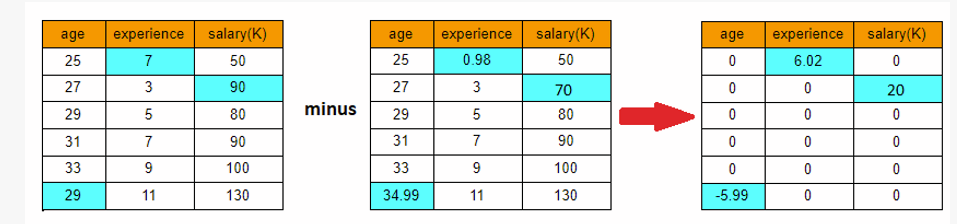

In [51]:
#!pip install impyute

In [53]:
# only for numeric features-
from impyute.imputation.cs import mice

# start the MICE training
df_mice=mice(df_mice.values)

In [54]:
df_mice

array([[ 2.        ,  3.93548387],
       [ 3.        ,  9.        ],
       [ 3.79703159, 16.        ],
       [ 5.        , 25.        ]])

In [ ]:
# Iterative Imputer is also very similar to mice-

Iterative Imputer initially initializes the missing values with the value passed for initial_strategy, where the initial strategy is the “mean” for each feature. The imputer then uses an estimator (where the default estimator used is Bayesian Ridge) at each step of the round-robin imputation. At each step, a feature column is chosen as the target variable y and the other feature columns are treated as predictor variables X. The missing values are then predicted for each feature. This process is repeated for at most “max_iter” number of times, where the default is 10 times (rounds). 

In [48]:
# example of Iterative Imputation - 
# only for numeric features-
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

dx = pd.DataFrame({'A': [2, 3, np.nan, 5],
                   'B': [np.nan, 9, 16, 25]})
dx

# Setting the random_state argument for reproducibility
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(dx)
dx = pd.DataFrame(imputed, columns=dx.columns)

round(dx, 2)

,A,B
0,2.00,1.0
1,3.00,9.0
2,3.87,16.0
3,5.00,25.0


In [68]:
imputer = IterativeImputer(random_state=42,initial_strategy='median')
imputed = imputer.fit_transform(dz[['B']])
dx['B'] = pd.DataFrame(imputed, columns=dx[['B']].columns)

In [69]:
dx

,A,B
0,2.0,16.666667
1,3.0,9.000000
2,NaN,16.000000
3,5.0,25.000000


### KNN Imputation
KNN imputation is a fairer approach to the Simple Imputation method. It operates by replacing missing data with the average mean of the neighbors nearest to it.The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.
You can use KNN imputation for the MCAR or MAR categories. And to implement it in Python you use the KNN imputation transformer

In [ ]:
# use encoding for categorical data -

In [ ]:
df_num_col = df.select_dtypes(include = 'number')
df_cat_col = df.select_dtypes(include = 'object')

In [ ]:
from sklearn import preprocessing
for col in df_cat:
    le = LabelEncoder()
    df_cat[col]= le.fit_transform(df_cat[col])
    

In [83]:
from sklearn.impute import KNNImputer
# I specify the nearest neighbor to be 3 
knn = KNNImputer(n_neighbors=5)
values = knn.fit_transform(dx)
dx = pd.DataFrame(values,columns = dx.columns)
dx

,A,B
0,2.000000,16.666667
1,3.000000,9.000000
2,3.333333,16.000000
3,5.000000,25.000000



Deterministic Regression Imputation-
In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

Stochastic Regression Imputation-
To add uncertainity back to the imputed variable values, we can add some normally distributed noise with a mean of zero and the variance equal to the standard error of regression estimates . This method is called as Random Imputation or Stochastic Regression Imputation
